# NetCDFs

Although text files are useful, sometimes we have <ins>**_multiple datasets_**</ins> for various points either in time or space. When this occurs, we can store this these multiple items within <ins>**netCDFs**</ins>.

<img src ="https://2.bp.blogspot.com/-8H2FCuCGhWY/VoPgf3RpoNI/AAAAAAAAH44/EPHtpGb_UBc/s1600/metadata.jpg" width = '400'>

By the end of this section, you will learn:

* [**what a netCDF is and why it is useful**](#What-is-netCDF?)
* [**to install ```netCDF4```**](#Installing-netCDF4)
* [**how to open a netCDF file**](#Opening-a-netCDF-file)

## What is netCDF?

**NetCDF (network Common Data Form)** stores <ins>**multidimensional data**</ins>, such as <ins>*spatial*</ins>, <ins>*temporal*</ins>, and <ins>*scientific*</ins> information. It is *not* only a file format but a set of software libraries. [**Unidata**](https://www.unidata.ucar.edu/software/netcdf/) has more information. 

A netCDF files has **three parts**:


<ins>**```metadata```**</ins> = data that describes the data contained within the file


<ins>**```dimensions```**</ins> = contains a name and size; can be used to represent physical dimensions


<ins>**```variables```**</ins> = contains a name, data type, and shape; represents an arrays of same value type


## Why do we use NETCDFs?

1) Large Datasets - Some datasets are too large for text files, making traditional storage methods inefficient.

2) Multi-Dimensional Data - Many datasets come in multiple dimensions and cannot be effectively represented in text files. This multi-dimensionality is a common characteristic of scientific and geospatial data.

3) Model and Geospatial Data -  This issue is particularly prevalent in model data or large geospatial datasets, where the complexity and size of the data are significant.

4) NetCDF Usage - In these cases, data are commonly stored in NetCDFs (Network Common Data Form), which are better suited for handling large, multi-dimensional datasets.

## Installing ```netCDF4```

In your terminal, type the following command:

**```conda install netCDF4```**

or

**```pip install netCDF4```**



*Warning: it may take a while to install.*

After installing **```netCDF4```**, you can import it into Python by typing:

```python
import netCDF4 as nc
```

## Opening a netCDF file

To <ins>**open a netCDF file**</ins>, we can use the **```Dataset()```** function:

In [1]:
import netCDF4 as nc
dsst = nc.Dataset('sst_monthly.nc')

We can use the **```print()```** function to <ins>**return the metadata**</ins> of the file:

In [2]:
print(dsst)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): day(50), lat(361), lon(720)
    variables(dimensions): float32 day(day), <class 'str'> day_str(day), float32 lat(lat), float32 lon(lon), float32 sst(day, lat, lon)
    groups: 


To break this down:

* **```dimensions(sizes)```**:
    - <ins>**```day```**</ins> with a size of 50
    - <ins>**```lat```**</ins> with a size of 361
    - <ins>**```lon```**</ins> with a size of 720
* **```variables(dimensions)```**:
    - <ins>**```float32 day(day)```**</ins> which has type ```float32``` with the name ```day``` and a dimension of ```day```
  
    - <ins>**```<class 'str'> day_str(day)```**</ins> which has type ```string``` with the name ```day_str``` and a dimension of ```day```
    
    - <ins>**```float32 lat(lat)```**</ins> which has type ```float32``` with the name ```lat``` and a dimension of ```lat```
    
    - <ins>**```float32 lon(lon)```**</ins> which has type ```float32``` with the name ```lon``` and a dimension of ```lon```
    
    - <ins>**```float32 sst(day, lat, lon)```**</ins> which has type ```float32``` with the name ```sst``` and dimensions of ```day```, ```lat```, ```lon```

## Viewing metadata of variables

We can use a **```for```** loop to <ins>**print out each variable's metadata**</ins>:

In [3]:
for variable in dsst.variables.values():
    print("\n",variable)


 <class 'netCDF4._netCDF4.Variable'>
float32 day(day)
unlimited dimensions: 
current shape = (50,)
filling on, default _FillValue of 9.969209968386869e+36 used

 <class 'netCDF4._netCDF4.Variable'>
vlen day_str(day)
vlen data type: <class 'str'>
unlimited dimensions: 
current shape = (50,)

 <class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
unlimited dimensions: 
current shape = (361,)
filling on, default _FillValue of 9.969209968386869e+36 used

 <class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
unlimited dimensions: 
current shape = (720,)
filling on, default _FillValue of 9.969209968386869e+36 used

 <class 'netCDF4._netCDF4.Variable'>
float32 sst(day, lat, lon)
unlimited dimensions: 
current shape = (50, 361, 720)
filling on, default _FillValue of 9.969209968386869e+36 used


We can also <ins>**view the data values of a specific variable**</ins> by putting it into an **array**:

In [4]:
import numpy as np

# index the specific variable we want to look at
dsst['lat']

# put the items within the variable into a useable array
sstlat = np.array(dsst['lat'])
print(sstlat)

[ 90.   89.5  89.   88.5  88.   87.5  87.   86.5  86.   85.5  85.   84.5
  84.   83.5  83.   82.5  82.   81.5  81.   80.5  80.   79.5  79.   78.5
  78.   77.5  77.   76.5  76.   75.5  75.   74.5  74.   73.5  73.   72.5
  72.   71.5  71.   70.5  70.   69.5  69.   68.5  68.   67.5  67.   66.5
  66.   65.5  65.   64.5  64.   63.5  63.   62.5  62.   61.5  61.   60.5
  60.   59.5  59.   58.5  58.   57.5  57.   56.5  56.   55.5  55.   54.5
  54.   53.5  53.   52.5  52.   51.5  51.   50.5  50.   49.5  49.   48.5
  48.   47.5  47.   46.5  46.   45.5  45.   44.5  44.   43.5  43.   42.5
  42.   41.5  41.   40.5  40.   39.5  39.   38.5  38.   37.5  37.   36.5
  36.   35.5  35.   34.5  34.   33.5  33.   32.5  32.   31.5  31.   30.5
  30.   29.5  29.   28.5  28.   27.5  27.   26.5  26.   25.5  25.   24.5
  24.   23.5  23.   22.5  22.   21.5  21.   20.5  20.   19.5  19.   18.5
  18.   17.5  17.   16.5  16.   15.5  15.   14.5  14.   13.5  13.   12.5
  12.   11.5  11.   10.5  10.    9.5   9.    8.5   

## Summary

* **[netCDFs](#What-is-netCDF?)** are files that hold **_multidimensional data_** and has three parts: <ins>**metadata**</ins>, <ins>**dimenions**</ins>, and <ins>**variables** </ins>


* To **[open a netCDF file](#Opening-a-netCDF-file)**, we can use **```Dataset()```** from the **```netCDF4```** library


* To **[view the metadata of a variable](#Viewing-metadata-of-variables)** in a netcdf, we can use a **```for``` loop**. To <ins>**view the specific data within a variable**</ins>, we can **index the variable and store it in an array**.

## Exercises

1. **Make an array** of the variable **```lon```** from **```sst_monthly.nc```** and **find its shape**.

2. **Make an array** of the variable **```sst```** from **```sst_monthly.nc```** and **find its shape**.

3. **Make a list** of the variable **```day_lon```** from **```sst_monthly.nc```** and find its shape.

### Answers

1. **Make an array** of the variable **```lon```** from **```sst_monthly.nc```** and **find its shape**.

In [5]:
import netCDF4 as nc
import numpy as np

# Open the netCDF file
dsst = nc.Dataset('sst_monthly.nc')

# Extract the longitude data
lon_array = np.array(dsst['lon'])
print("Longitude Array:", lon_array)
print("Shape of Longitude Array:", lon_array.shape)


Longitude Array: [  0.    0.5   1.    1.5   2.    2.5   3.    3.5   4.    4.5   5.    5.5
   6.    6.5   7.    7.5   8.    8.5   9.    9.5  10.   10.5  11.   11.5
  12.   12.5  13.   13.5  14.   14.5  15.   15.5  16.   16.5  17.   17.5
  18.   18.5  19.   19.5  20.   20.5  21.   21.5  22.   22.5  23.   23.5
  24.   24.5  25.   25.5  26.   26.5  27.   27.5  28.   28.5  29.   29.5
  30.   30.5  31.   31.5  32.   32.5  33.   33.5  34.   34.5  35.   35.5
  36.   36.5  37.   37.5  38.   38.5  39.   39.5  40.   40.5  41.   41.5
  42.   42.5  43.   43.5  44.   44.5  45.   45.5  46.   46.5  47.   47.5
  48.   48.5  49.   49.5  50.   50.5  51.   51.5  52.   52.5  53.   53.5
  54.   54.5  55.   55.5  56.   56.5  57.   57.5  58.   58.5  59.   59.5
  60.   60.5  61.   61.5  62.   62.5  63.   63.5  64.   64.5  65.   65.5
  66.   66.5  67.   67.5  68.   68.5  69.   69.5  70.   70.5  71.   71.5
  72.   72.5  73.   73.5  74.   74.5  75.   75.5  76.   76.5  77.   77.5
  78.   78.5  79.   79.5  80.   80

2. **Make an array** of the variable **```sst```** from **```sst_monthly.nc```** and **find its shape**.

In [6]:
# Extract the sea surface temperature data
sst_array = np.array(dsst['sst'])
print("SST Array:", sst_array)
print("Shape of SST Array:", sst_array.shape)

SST Array: [[[271.4602  271.4602  271.4602  ... 271.4602  271.4602  271.4602 ]
  [271.4602  271.4602  271.4602  ... 271.4602  271.4602  271.4602 ]
  [271.4602  271.4602  271.4602  ... 271.4602  271.4602  271.4602 ]
  ...
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]]

 [[271.4599  271.4599  271.4599  ... 271.4599  271.4599  271.4599 ]
  [271.45984 271.45984 271.4599  ... 271.4599  271.4599  271.45984]
  [271.4599  271.4599  271.4599  ... 271.4599  271.4599  271.4599 ]
  ...
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]
  [      nan       nan       nan ...       nan       nan       nan]]

 [[271.46024 271.46024 271.46024 ... 271.46024 271.46024 271.46024]
  [271.46    271.46    271.46024 ... 271.46024 271.46024 271.46   ]
  [271.46024 271.4602

3. **Make a list** of the variable **```day_lon```** from **```sst_monthly.nc```** and find its shape.

In [7]:
# Extract the day data
day_array = np.array(dsst['day'])
print("Day Array:", day_array)
print("Shape of Day Array:", day_array.shape)

Day Array: [3.155328e+08 3.155544e+08 3.182328e+08 3.207384e+08 3.234168e+08
 3.260088e+08 3.286872e+08 3.312792e+08 3.339576e+08 3.366360e+08
 3.392280e+08 3.419064e+08 3.444984e+08 3.471768e+08 3.498552e+08
 3.522744e+08 3.549528e+08 3.575448e+08 3.602232e+08 3.628152e+08
 3.654936e+08 3.681720e+08 3.707640e+08 3.734424e+08 3.760344e+08
 3.787128e+08 3.813912e+08 3.838104e+08 3.864888e+08 3.890808e+08
 3.917592e+08 3.943512e+08 3.970296e+08 3.997080e+08 4.023000e+08
 4.049784e+08 4.075704e+08 4.102488e+08 4.129272e+08 4.153464e+08
 4.180248e+08 4.206168e+08 4.232952e+08 4.258872e+08 4.285656e+08
 4.312440e+08 4.338360e+08 4.365144e+08 4.391064e+08 4.417848e+08]
Shape of Day Array: (50,)


## NetCDF and Xarray

Using xarray for NetCDF files offers an intuitive interface to work with multi-dimensional scientific data.

In [2]:
import xarray as xr

sr_xr = xr.open_dataset("searise.nc",decode_times=False)

### Index into a dataset and plot it

When working with datasets in Python, indexing into a dataset allows you to select and retrieve specific subsets of data based on your criteria. This process is crucial for analyzing particular segments or dimensions of your data.

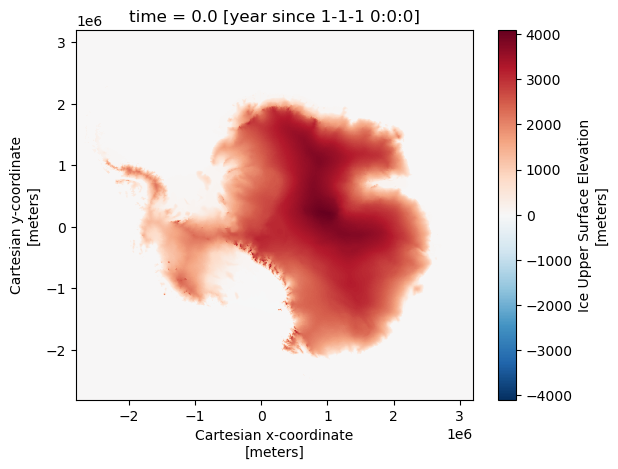

In [3]:
usrf_xr = sr_xr['usrf']

usrf_xr.plot()

### Indexing to get single values

When you need to extract specific data points from a dataset, indexing is a straightforward approach to directly access single values. By specifying the index or position of the data within the dataset's structure, you can retrieve individual elements efficiently.

In [4]:
#Select a specific coordinate and get the value
usrf_xr.sel(y1=-2800000, x1=-2800000)

#Select a index and get the value
usrf_xr.isel(y1=500, x1=500)

<xarray.DataArray 'usrf' (time: 1)>
array([2749.5881], dtype=float32)
Coordinates:
  * time     (time) float32 0.0
    y1       float32 -3e+05
    x1       float32 -3e+05
Attributes:
    Source:         (Provided by J.A. Griggs and J.L. Bamber) [1] Bamber, J.L...
    long_name:      Ice Upper Surface Elevation
    standard_name:  surface_altitude
    units:          meters

### 2D data in a netCDF

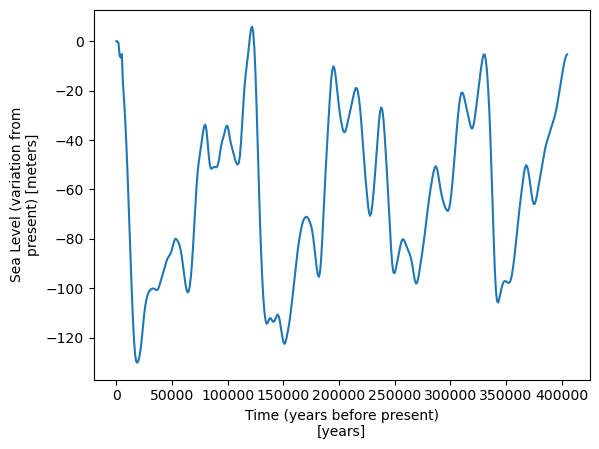

In [5]:
sea_level = sr_xr['sealevel_time_series']

sea_level.plot()

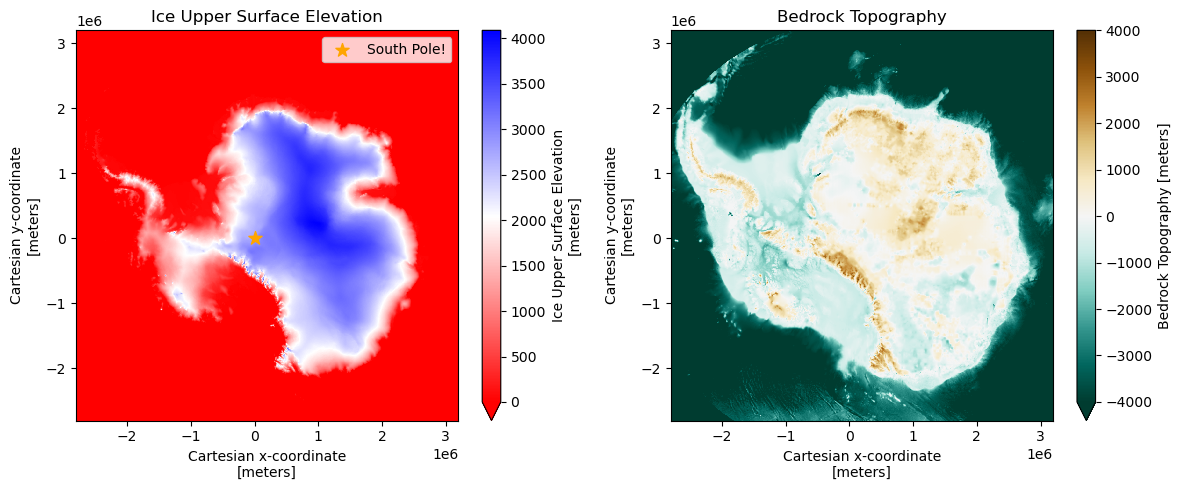

In [6]:
#Plotting usrf and topg on the same figure
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
surface= sr_xr['usrf']
surface.plot(ax=ax1,cmap = 'bwr_r', vmin=0)
sr_xr['topg'].plot(ax=ax2, cmap = 'BrBG_r',vmax=4000)
ax1.set_title(sr_xr['usrf'].long_name)
ax2.set_title(sr_xr['topg'].long_name)
ax1.scatter(0,0,label='South Pole!',marker='*',color='orange',s=100)
ax1.legend()
plt.tight_layout()
